In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import warnings
warnings.filterwarnings('ignore')
import pylab as plt
from tensorflow.keras.utils import to_categorical

In [ ]:
batch_size = 128
num_classes = 10
epochs = 2
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/= 255
x_test /= 255
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


In [ ]:
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)
print('label:',y_test[400:401])

label: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


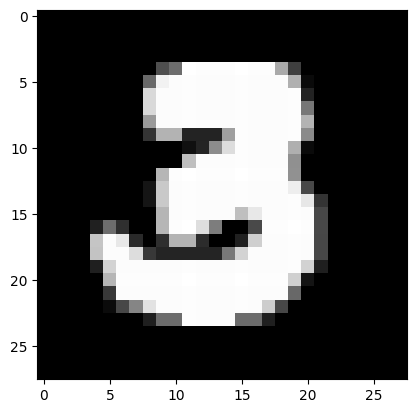

In [ ]:
plt.imshow(x_test[200:201].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(8, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 16)        0         
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 32)                73760     
                                                        

Test Loss:  0.09471547603607178
Test Accuracy:  0.9714999794960022


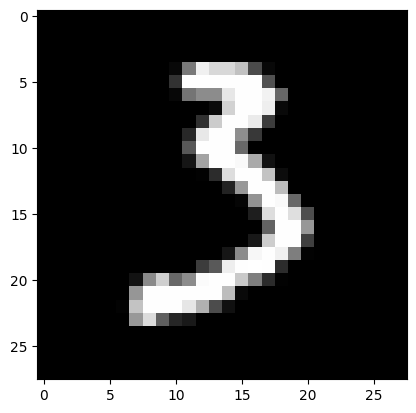

1/1 [==============================] - 0s 92ms/step
Prediction score:
 [4.5084824e-05 9.8112796e-06 6.9701597e-03 9.4930416e-01 2.3477638e-07
 4.1965328e-02 3.0696822e-06 6.3293189e-04 6.5645785e-04 4.1275998e-04]

Thresholded score:
 [0 0 0 1 0 0 0 0 0 0]
Predicted digit:
 3


In [ ]:
score = model.evaluate(x_test,y_test, verbose = 0)
print('Test Loss: ', score[0])
print('Test Accuracy: ', score[1])
plt.imshow(x_test[230:231].reshape(28,28), cmap= 'gray')
plt.show()
prediction = model.predict(x_test[230:231])
print('Prediction score:\n',prediction[0])
thresholded = (prediction > 0.5) * 1
print('\nThresholded score:\n',thresholded[0])
print('Predicted digit:\n',np.where(thresholded == 1)[1][0])